**Business Problem**
What is the characteristics of Airbnb target customers?
Which of airbnb's current promotion channels are of high quality and which ones are not doing well enough and need improvement?
What insights can you obtain from the analysis on conversion rate and churn rate?

**Tasks**
1. Customer Profile Analysis
2. Promotion Channel Analysis
3. Conversion Funnel Analysis

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import squarify
import plotly.express as px



In [25]:
user = pd.read_csv(r"D:\OneDrive - HKUST Connect\Data analysis project\Airbnb\data\train_users_2.csv")
print(user.dtypes)
print(user.columns)
print(user.shape)

id                          object
date_account_created        object
timestamp_first_active     float64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
(213451, 16)


In [26]:
session = pd.read_csv(r"D:\OneDrive - HKUST Connect\Data analysis project\Airbnb\data\sessions.csv")
print(session.dtypes)
print(session.columns)
print(session.shape)

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object
Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')
(10567737, 6)


In [27]:
user.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010/6/28,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011/5/25,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010/9/28,2.009060e+13,2010/8/2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011/12/5,2.009100e+13,2012/9/8,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010/9/14,2.009120e+13,2010/2/18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [28]:
session.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


***Data Cleaning***

In [29]:
# Detect Na and duplicated value of user id
print(user['id'].isnull().sum())
print(user['id'].duplicated().sum())

0
0


In [30]:
# Remove records of age lower than 18 or more than 60 or Na.
user['age'].fillna(0)
user = user[(user['age']>17) & (user['age']<61)]

***Customer Profile Analysis***

In [31]:
# Gender distribution
male = user.loc[user['gender']=='MALE'].shape[0]
female = user.loc[user['gender']=='FEMALE'].shape[0]
print('Proportion of male user is',round(male/(male+female),2), 'and proportion of female user is',round(female/(male+female),2))


Proportion of male user is 0.47 and proportion of female user is 0.53


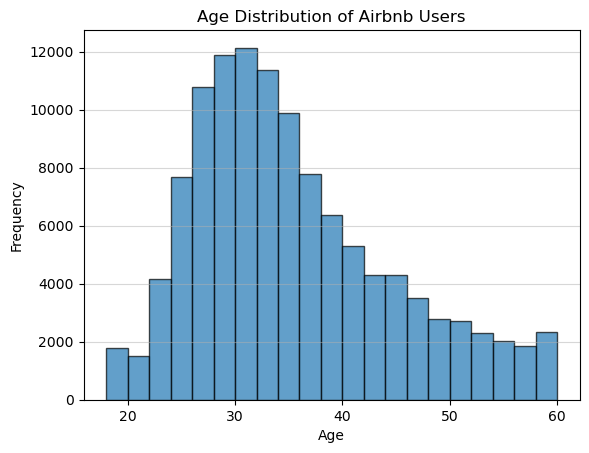

The users of airbnb are mainly middle-aged and young people (26-38 years old)


In [32]:
# Age distribution
plt.hist(user['age'], bins=21, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Airbnb Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()
print('The users of airbnb are mainly middle-aged and young people (26-38 years old)')

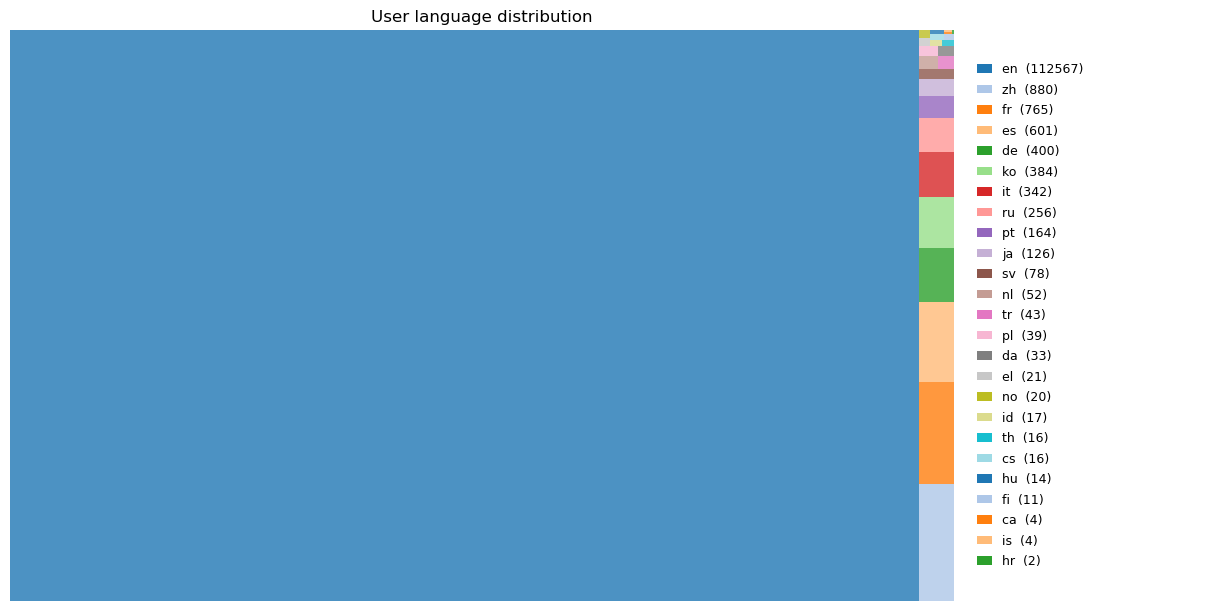

The major users are from English-speaking countries. The next are China and France.


In [33]:
# User language distribution
counts = user['language'].value_counts()
labels = counts.index.tolist()
sizes  = counts.values.tolist()
cmap = plt.get_cmap("tab20")
colors = [cmap(i % 20) for i in range(len(labels))]
total = sum(sizes)

#set the threshold
labels_in_box = [lab if (s/total) >= 0.03 else "" for lab, s in zip(labels, sizes)]

#plot for tree map
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

squarify.plot(sizes=sizes, label=None, color=colors, alpha=0.8, ax=ax0)
ax0.set_title("User language distribution")
ax0.axis("off")

# design the legend at right
handles = [
    Patch(facecolor=colors[i], label=f"{labels[i]}  ({sizes[i]})")
    for i in range(len(labels))
]
ax1.axis("off")
ax1.legend(handles=handles, loc="center left", frameon=False, fontsize=9, handlelength=1.2, labelspacing=0.6)
plt.show()
print('The major users are from English-speaking countries. The next are China and France.')

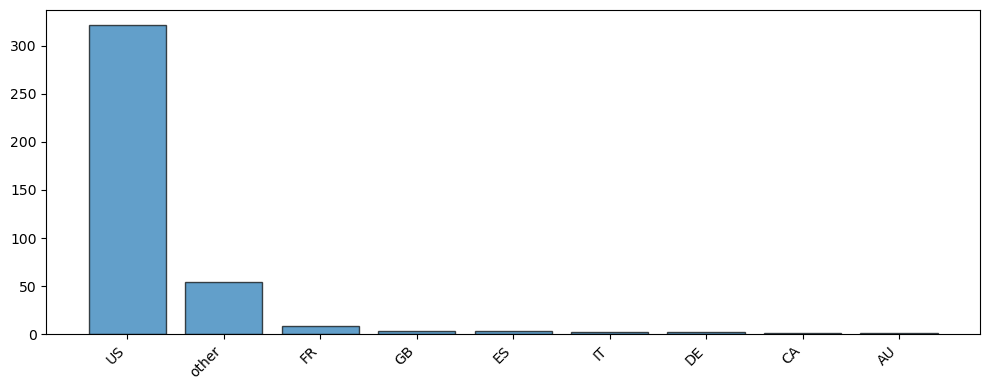

Major destination from Chinese users is U.S., which account for more than 80%


In [34]:
# Distribution of Chinese user destinations
fre = user.loc[user['language'] == 'zh', 'country_destination'].value_counts()
fre = fre.drop('NDF')

plt.figure(figsize=(10,4))
plt.bar(fre.index, fre.values, edgecolor='black', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print('Major destination from Chinese users is U.S., which account for more than 80%')

***Channel Analysis***

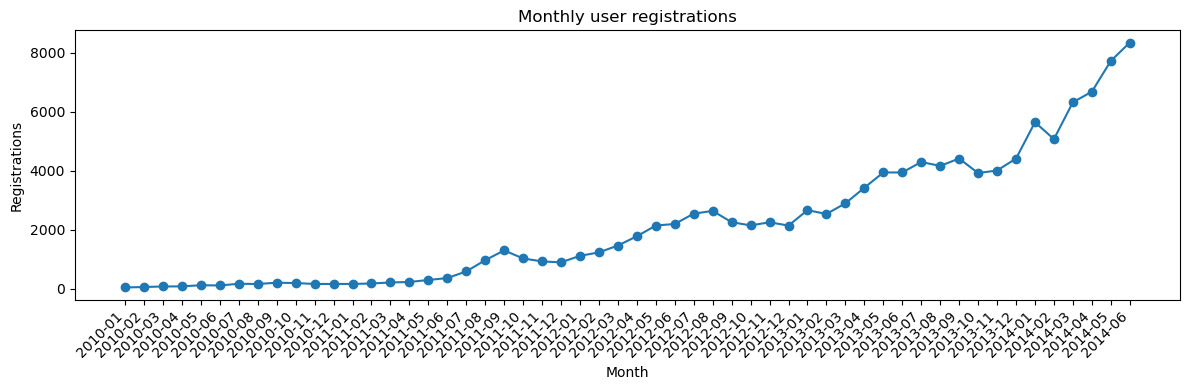

Conclusion: 
 1. The user registration number steadily increased. It was relatively stable before 2012 and then experienced rapid growth after 2012. 
 2. The number of user registrations shows seasonal patterns. There is a registration peak in September every year. The possible reason is that summer is the tourist season in the Northern Hemisphere, with an increase in the number of tourists leading to an increase in the demand for short-term rentals.


In [35]:
# Monthly registration analysis
user['date_account_created'] = pd.to_datetime(user['date_account_created'], errors='coerce')

monthly = (user['date_account_created']
             .groupby(user['date_account_created'].dt.to_period('M'))
             .size())

# plot the linear trend
plt.figure(figsize=(12,4))
plt.plot(monthly.index.astype(str), monthly.values, marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Registrations')
plt.title('Monthly user registrations')
plt.tight_layout()
plt.show()

print('Conclusion:','\n','1. The user registration number steadily increased. It was relatively stable before 2012 and then experienced rapid growth after 2012.','\n','2. The number of user registrations shows seasonal patterns. There is a registration peak in September every year. The possible reason is that summer is the tourist season in the Northern Hemisphere, with an increase in the number of tourists leading to an increase in the demand for short-term rentals.')

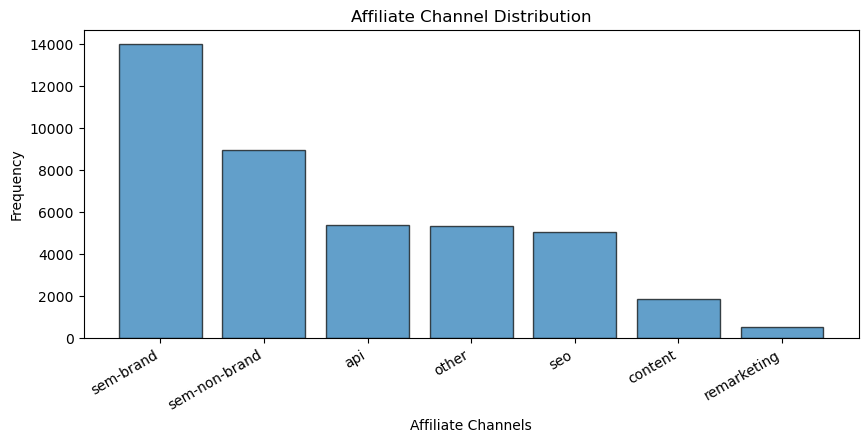

In [36]:
# Promotion channel analysis
pc_count = user['affiliate_channel'].astype(str).value_counts()
pc_count = pc_count.drop('direct') # remove direct since we only consider promotion channel

plt.figure(figsize=(10,4))
plt.bar(pc_count.index, pc_count.values, edgecolor='black', alpha=0.7)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Affiliate Channels')
plt.ylabel('Frequency')
plt.title(f'Affiliate Channel Distribution')
plt.show()

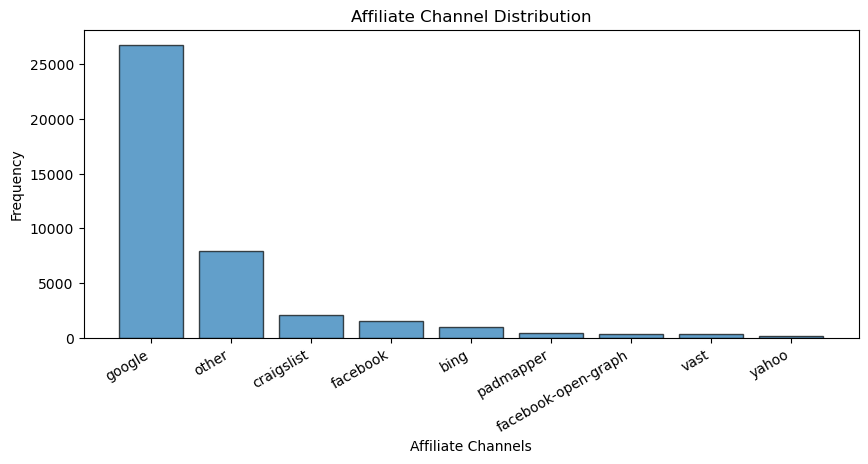

In [37]:
# Promotion provider analysis
pp_count = user['affiliate_provider'].astype(str).value_counts()
pp_count = pp_count.drop('direct') # remove direct since we only consider promotion channel
pp_count = pp_count[pp_count >= 200] # remove the records of less than 200 promotion

plt.figure(figsize=(10,4))
plt.bar(pp_count.index, pp_count.values, edgecolor='black', alpha=0.7)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Affiliate Channels')
plt.ylabel('Frequency')
plt.title(f'Affiliate Channel Distribution')
plt.show()

In [38]:
# Conversion rate analysis
rm_direct = (user['affiliate_channel'].astype(str).str.lower() == 'direct') | \
              (user['affiliate_provider'].astype(str).str.lower() == 'direct')
user = user.loc[~rm_direct].copy()

user['converted'] = user['date_first_booking'].notna()
cross = (user.groupby(['affiliate_channel', 'affiliate_provider'])
         .agg(frequency=('converted', 'size'),
              converted=('converted', 'sum')).reset_index())
cross['conversion_rate'] = round(cross['converted'] / cross['frequency'],3)
cross = cross.sort_values(['frequency', 'conversion_rate'], ascending=[False, False])

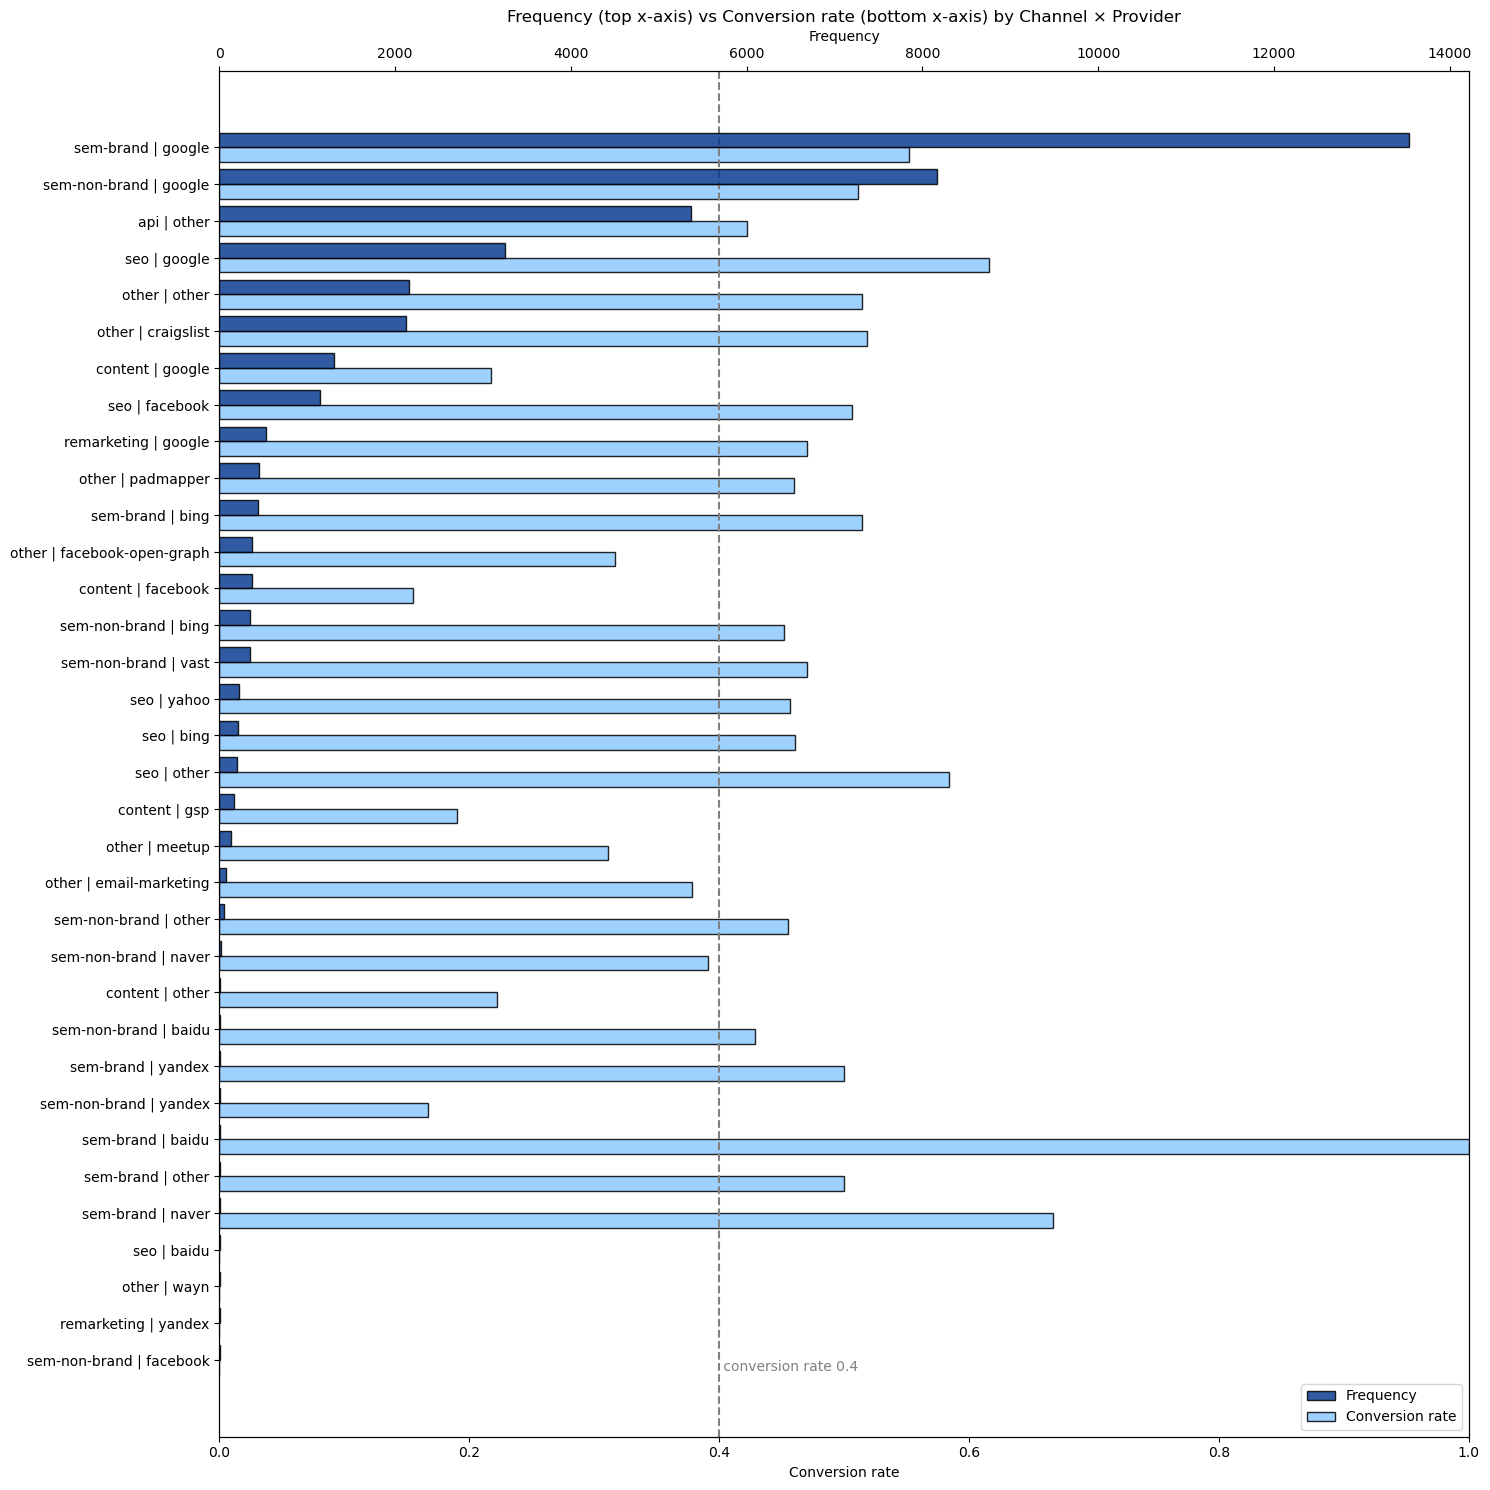

Conclusion: 
 1. The promotion effect of Google Ads is the best. Among the main channels (top 7 highest registration volume), Google accounts for four. For Google, the best effect is the brand bidding registration volume, followed by the non-brand bidding registration volume, then SEO and content promotion. We can continue to consider using Google as the main promotion channel. 
 2. The conversion rate of API promotion is significantly lower than other main promotion channels. 
 3. Among all channels, the conversion rate of the seo channel is over 40%. However, compared to other channels, the registration volume of these channels is relatively lower.


In [39]:
labels = cross['affiliate_channel'].astype(str) + ' | ' + cross['affiliate_provider'].astype(str)
y = np.arange(len(labels))
h = 0.4

fig, ax1 = plt.subplots(figsize=(15, 15))
bars_rate = ax1.barh(y + h/2, cross['conversion_rate'].values, height=h,
                     color='#8EC9FF', edgecolor='black', alpha=0.85, label='Conversion rate')
ax1.set_xlabel('Conversion rate')
ax1.set_xlim(0, 1)
ax1.set_yticks(y)
ax1.set_yticklabels(labels)

ax1.axvline(x=0.4, color='gray', linestyle='--', linewidth=1.5)
ax1.text(0.4, len(labels)-1, ' conversion rate 0.4', va='top', ha='left', color='gray')

ax2 = ax1.twiny()
bars_freq = ax2.barh(y - h/2, cross['frequency'].values, height=h,
                     color='#0B3D91', edgecolor='black', alpha=0.85, label='Frequency')
ax2.set_xlabel('Frequency')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles2 + handles1, labels2 + labels1, loc='lower right')  # 先放frequency再放rate也行

ax1.set_title('Frequency (top x-axis) vs Conversion rate (bottom x-axis) by Channel × Provider')
ax1.invert_yaxis()
plt.tight_layout()
plt.show()
print('Conclusion: \n 1. The promotion effect of Google Ads is the best. Among the main channels (top 7 highest registration volume), Google accounts for four. For Google, the best effect is the brand bidding registration volume, followed by the non-brand bidding registration volume, then SEO and content promotion. We can continue to consider using Google as the main promotion channel. \n 2. The conversion rate of API promotion is significantly lower than other main promotion channels. \n 3. Among all channels, the conversion rate of the seo channel is over 40%. However, compared to other channels, the registration volume of these channels is relatively lower.')

In [40]:
# Analysis on first affiliate tracked
fat = user.groupby('first_affiliate_tracked')['converted'].agg(frequency='size', converted='sum').reset_index()
fat['conversion_rate'] = fat['converted'] / fat['frequency']
fat = fat.sort_values(['frequency', 'conversion_rate'], ascending=[False, False])

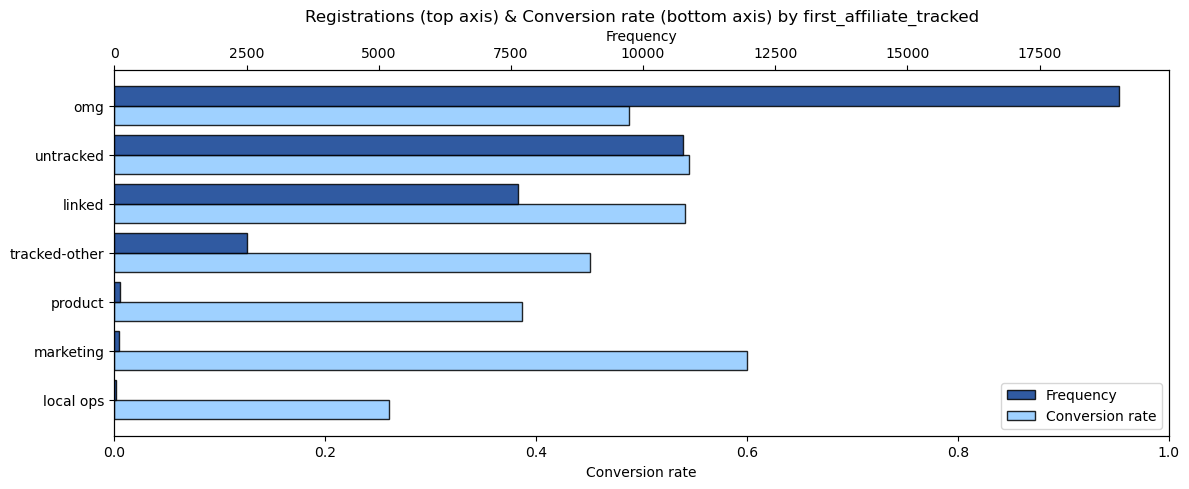

Conclusion: 
 1. "omg" has the highest number of registrations, but it has no specific meaning so that the source cannot be analyzed. 
 2. The secondary marketing content is "untracked" (meaning the data tracking has failed). The data tracking for the registration has something wrong.
 3. The registration volume from the product side, marketing side and local operations is relatively low. Further follow-up on: a. App internal guidance, inviting new users, cross-product promotion b. marketing activity quality c. effectiveness of offline event promotion is required.


In [41]:
labels = fat['first_affiliate_tracked'].fillna('NA').astype(str).values
y = np.arange(len(labels))
h = 0.4

fig, ax1 = plt.subplots(figsize=(12, 5))

# 下方 x 轴：conversion_rate（浅蓝）
ax1.barh(y + h/2, fat['conversion_rate'].values, height=h,
         color='#8EC9FF', edgecolor='black', alpha=0.85, label='Conversion rate')
ax1.set_xlabel('Conversion rate')
ax1.set_xlim(0, 1)
ax1.set_yticks(y)
ax1.set_yticklabels(labels)

# 上方 x 轴：frequency（深蓝）
ax2 = ax1.twiny()
ax2.barh(y - h/2, fat['frequency'].values, height=h,
         color='#0B3D91', edgecolor='black', alpha=0.85, label='Frequency')
ax2.set_xlabel('Frequency')

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles2 + handles1, labels2 + labels1, loc='lower right')

ax1.set_title('Registrations (top axis) & Conversion rate (bottom axis) by first_affiliate_tracked')
ax1.invert_yaxis()
plt.tight_layout()
plt.show()

print('Conclusion: \n 1. "omg" has the highest number of registrations, but it has no specific meaning so that the source cannot be analyzed. \n 2. The secondary marketing content is "untracked" (meaning the data tracking has failed). The data tracking for the registration has something wrong.\n 3. The registration volume from the product side, marketing side and local operations is relatively low. Further follow-up on: a. App internal guidance, inviting new users, cross-product promotion b. marketing activity quality c. effectiveness of offline event promotion is required.')

***Conversion Funnel Analysis***

In [42]:
s1 = session['user_id'].nunique()
print('Total number of user:',s1)

s2 = (session['user_id'].value_counts() >= 10).sum()
p2 = round(s2/s1*100,2)
print('Total number of active user:',s2,', which accounts for',p2,'% of last step')

s3 = session.loc[session['action_detail']=='view_search_results', 'user_id'].nunique()
p3 = round(s3/s2*100,2)
print('Total number of user who searched for apartments:',s3,', which accounts for',p3,'% of last step')

s4 = session.loc[session['action_detail']=='reservations', 'user_id'].nunique()
p4 = round(s4/s3*100,2)
print('Total number of user who has made reservation:',s4,', which accounts for',p4,'% of last step')

s5 = session.loc[session['action_detail']=='payment_instruments', 'user_id'].nunique()
p5 = round(s5/s4*100,2)
print('Total number of user who has paid for reservation:',s5,', which accounts for',p5,'% of last step')

s6 = (session.loc[session["action_detail"].eq("payment_instruments"), "user_id"].value_counts()>=2).sum()
p6 = round(s6/s5*100,2)
print('Total number of user who has paid for more than one reservations:',s6,', which accounts for',p6,'% of last step')

Total number of user: 135483
Total number of active user: 114001 , which accounts for 84.14 % of last step
Total number of user who searched for apartments: 87640 , which accounts for 76.88 % of last step
Total number of user who has made reservation: 10366 , which accounts for 11.83 % of last step
Total number of user who has paid for reservation: 9018 , which accounts for 87.0 % of last step
Total number of user who has paid for more than one reservations: 4153 , which accounts for 46.05 % of last step


In [43]:
data = dict(number=[s1, s2, s3, s4, s5, s6],
    stage=["All users", "Active users", "Search apartments", "Make reservation", "Confirm payment", "More than one payments"])
fig = px.funnel(data, x='number', y='stage')
fig.update_traces(textinfo="value+percent previous",textposition="inside")
fig.update_xaxes(tickformat="d")
fig.show()

print('Conclusion: \n 1. The conversion rates for most processes are normal, generally above 70%. The conversion rate from the search stage to the reservation stage is extremely low. Possible reasons include an unreasonable search algorithm or insufficient resources. \n 2. The rate of users making a second reservation is relatively low, at only 46%. The customer department needs to conduct thorough customer surveys in order to understand why customers are unwilling to place orders after using Airbnb once.')

Conclusion: 
 1. The conversion rates for most processes are normal, generally above 70%. The conversion rate from the search stage to the reservation stage is extremely low. Possible reasons include an unreasonable search algorithm or insufficient resources. 
 2. The rate of users making a second reservation is relatively low, at only 46%. The customer department needs to conduct thorough customer surveys in order to understand why customers are unwilling to place orders after using Airbnb once.


***Actionable Insights***

From Customer Profile Analysis:
1. Based on the users age distribution, increase the advertising efforts for customers aged 26 to 38.
2. The languages are widely distributed. It is suggested to design multiple language settings for program development to explore other markets.

From Promotion Channel Analysis:
1. July to October is the peak season for business. It is recommended that the operation department increase the resources of promotional activities during this period and also enhance the investment in channel advertising.
2. Increase the advertising efforts on Google and allocate more resources to brand bidding.
3. The conversion rates of the API promotion channel is relatively low. It is suggested that the product design department identify the API-integrated products with the lowest rankings, communicate with the corresponding products, and investigate the reasons from the perspectives of product process design and interaction design. \n 4. The effectiveness of user acquisition and conversion varies depending on the marketing content. Excellent marketing content (such as linked) and poor-performing marketing content (such as local ops) should be optimized or even replaced in a timely manner during the event. If it is after the event, the operation department is recommended to conduct a comparative analysis of different quality marketing content and summarize the methodology for content planning, which will facilitate future practice.

From Conversion Funnel Analysis:
1. The probability of users progressing to the reservation stage is extremely low, at only 12%. It is required to follow up whether this is due to an internal algorithm issue or a shortage of available properties from external landlords.
2. More than 50% of users do not make one more reservation and payment after their first purchase. This can be addressed by improving payment methods and reducing communication friction to retain them. The next step is to segment the population: mark users who "have entered the payment process multiple times or have incomplete orders" and "have not made a reservation after communication" as two groups. For these two groups, respectively implement two sets of strategies: "total price transparency + subsidies/coupons" and "immediate booking/high-response landlord priority recommendation + message template". Use experiments to compare the 90-day repeat purchase rate with the overall conversion rate from viewing properties to completing bookings, and determine which strategy is the most effective.